In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import ConnectionPatch
import matplotlib.colors as mcolors

import warnings

In [2]:
warnings.filterwarnings('ignore')

# Task1. Real Data

In [3]:
def read_gff(gff_file):
    '''Function read_gff() reads either gziped or not .gff file and transforms it into pandas.DataFrame
    
    Parameters:
    gff_file (str): path to .gff input file
    
    Returns: pandas.DataFrame 
    '''
    
    df_gff = pd.read_table(gff_file, sep='\t', comment='#', names=['chromosome', 'source', 'type', 'start', 
                                                                  'end', 'score', 'strand', 'phase', 'rRNA_type'])
    df_gff["rRNA_type"] = df_gff["rRNA_type"].str.extract('([\d\.]{1,3}S)') # extracting type of rRNA from string
    return df_gff

In [4]:
def read_bed6(bed_file):
    '''Function read_bed() reads .bed file and transforms it into pandas.DataFrame
    
    Parameters:
    bed_file (str): path to .bed input file
    
    Returns: pandas.DataFrame 
    '''
    
    df_bed = pd.read_table(bed_file, sep='\t', names=['chromosome', 'start', 'end', 
                                                      'name', 'score', 'strand'])
    return df_bed

In [5]:
df_annot = read_gff("data/rrna_annotation.gff")
df_annot

,chromosome,source,type,start,end,score,strand,phase,rRNA_type
0,Reference_10,barrnap:0.9,rRNA,67122,68652,0.000000e+00,+,.,16S
1,Reference_10,barrnap:0.9,rRNA,68981,72061,0.000000e+00,+,.,23S
2,Reference_10,barrnap:0.9,rRNA,469298,470826,0.000000e+00,+,.,16S
3,Reference_10,barrnap:0.9,rRNA,471166,474246,0.000000e+00,+,.,23S
4,Reference_10,barrnap:0.9,rRNA,3629599,3632680,0.000000e+00,-,.,23S
...,...,...,...,...,...,...,...,...,...
343,Reference_25,barrnap:0.9,rRNA,1819878,1822785,0.000000e+00,+,.,23S
344,Reference_25,barrnap:0.9,rRNA,1822913,1823016,2.900000e-10,+,.,5S
345,Reference_25,barrnap:0.9,rRNA,3744056,3744159,2.900000e-10,-,.,5S
346,Reference_25,barrnap:0.9,rRNA,3744287,3747194,0.000000e+00,-,.,23S


In [6]:
df_aln = read_bed6("data/alignment.bed")
df_aln

,chromosome,start,end,name,score,strand
0,Reference_1,197681,200286,NODE_1445_length_2603_cov_1135.593799,41,-
1,Reference_1,202886,202996,NODE_19543_length_110_cov_1549.290909,0,-
2,Reference_1,202941,203377,NODE_5666_length_436_cov_418.653543,16,+
3,Reference_1,203322,785222,NODE_25_length_581906_cov_146.024228,60,+
4,Reference_1,785169,1763981,NODE_11_length_978812_cov_132.517515,60,-
...,...,...,...,...,...,...
7705,Reference_26,5532432,5535601,NODE_1329_length_3169_cov_103.935132,5,+
7706,Reference_26,5535546,5535722,NODE_19238_length_176_cov_67.305785,0,+
7707,Reference_26,5535667,5537226,NODE_2001_length_1559_cov_98.029920,0,+
7708,Reference_26,5537171,5537343,NODE_19245_length_172_cov_84.367521,0,+


In [7]:
# DataFrame with the number of sequences in rRNA types for each reference 
rRNA_type_chr =  df_annot.groupby('chromosome')['rRNA_type'].value_counts().unstack().fillna(0)
rRNA_type_chr

rRNA_type,16S,23S,5S
chromosome,,,
Reference_1,2.0,2.0,2.0
Reference_10,5.0,5.0,0.0
Reference_11,2.0,2.0,2.0
Reference_12,2.0,2.0,2.0
Reference_13,4.0,4.0,4.0
Reference_14,4.0,4.0,5.0
Reference_15,8.0,8.0,8.0
Reference_16,7.0,7.0,8.0
Reference_17,7.0,7.0,8.0


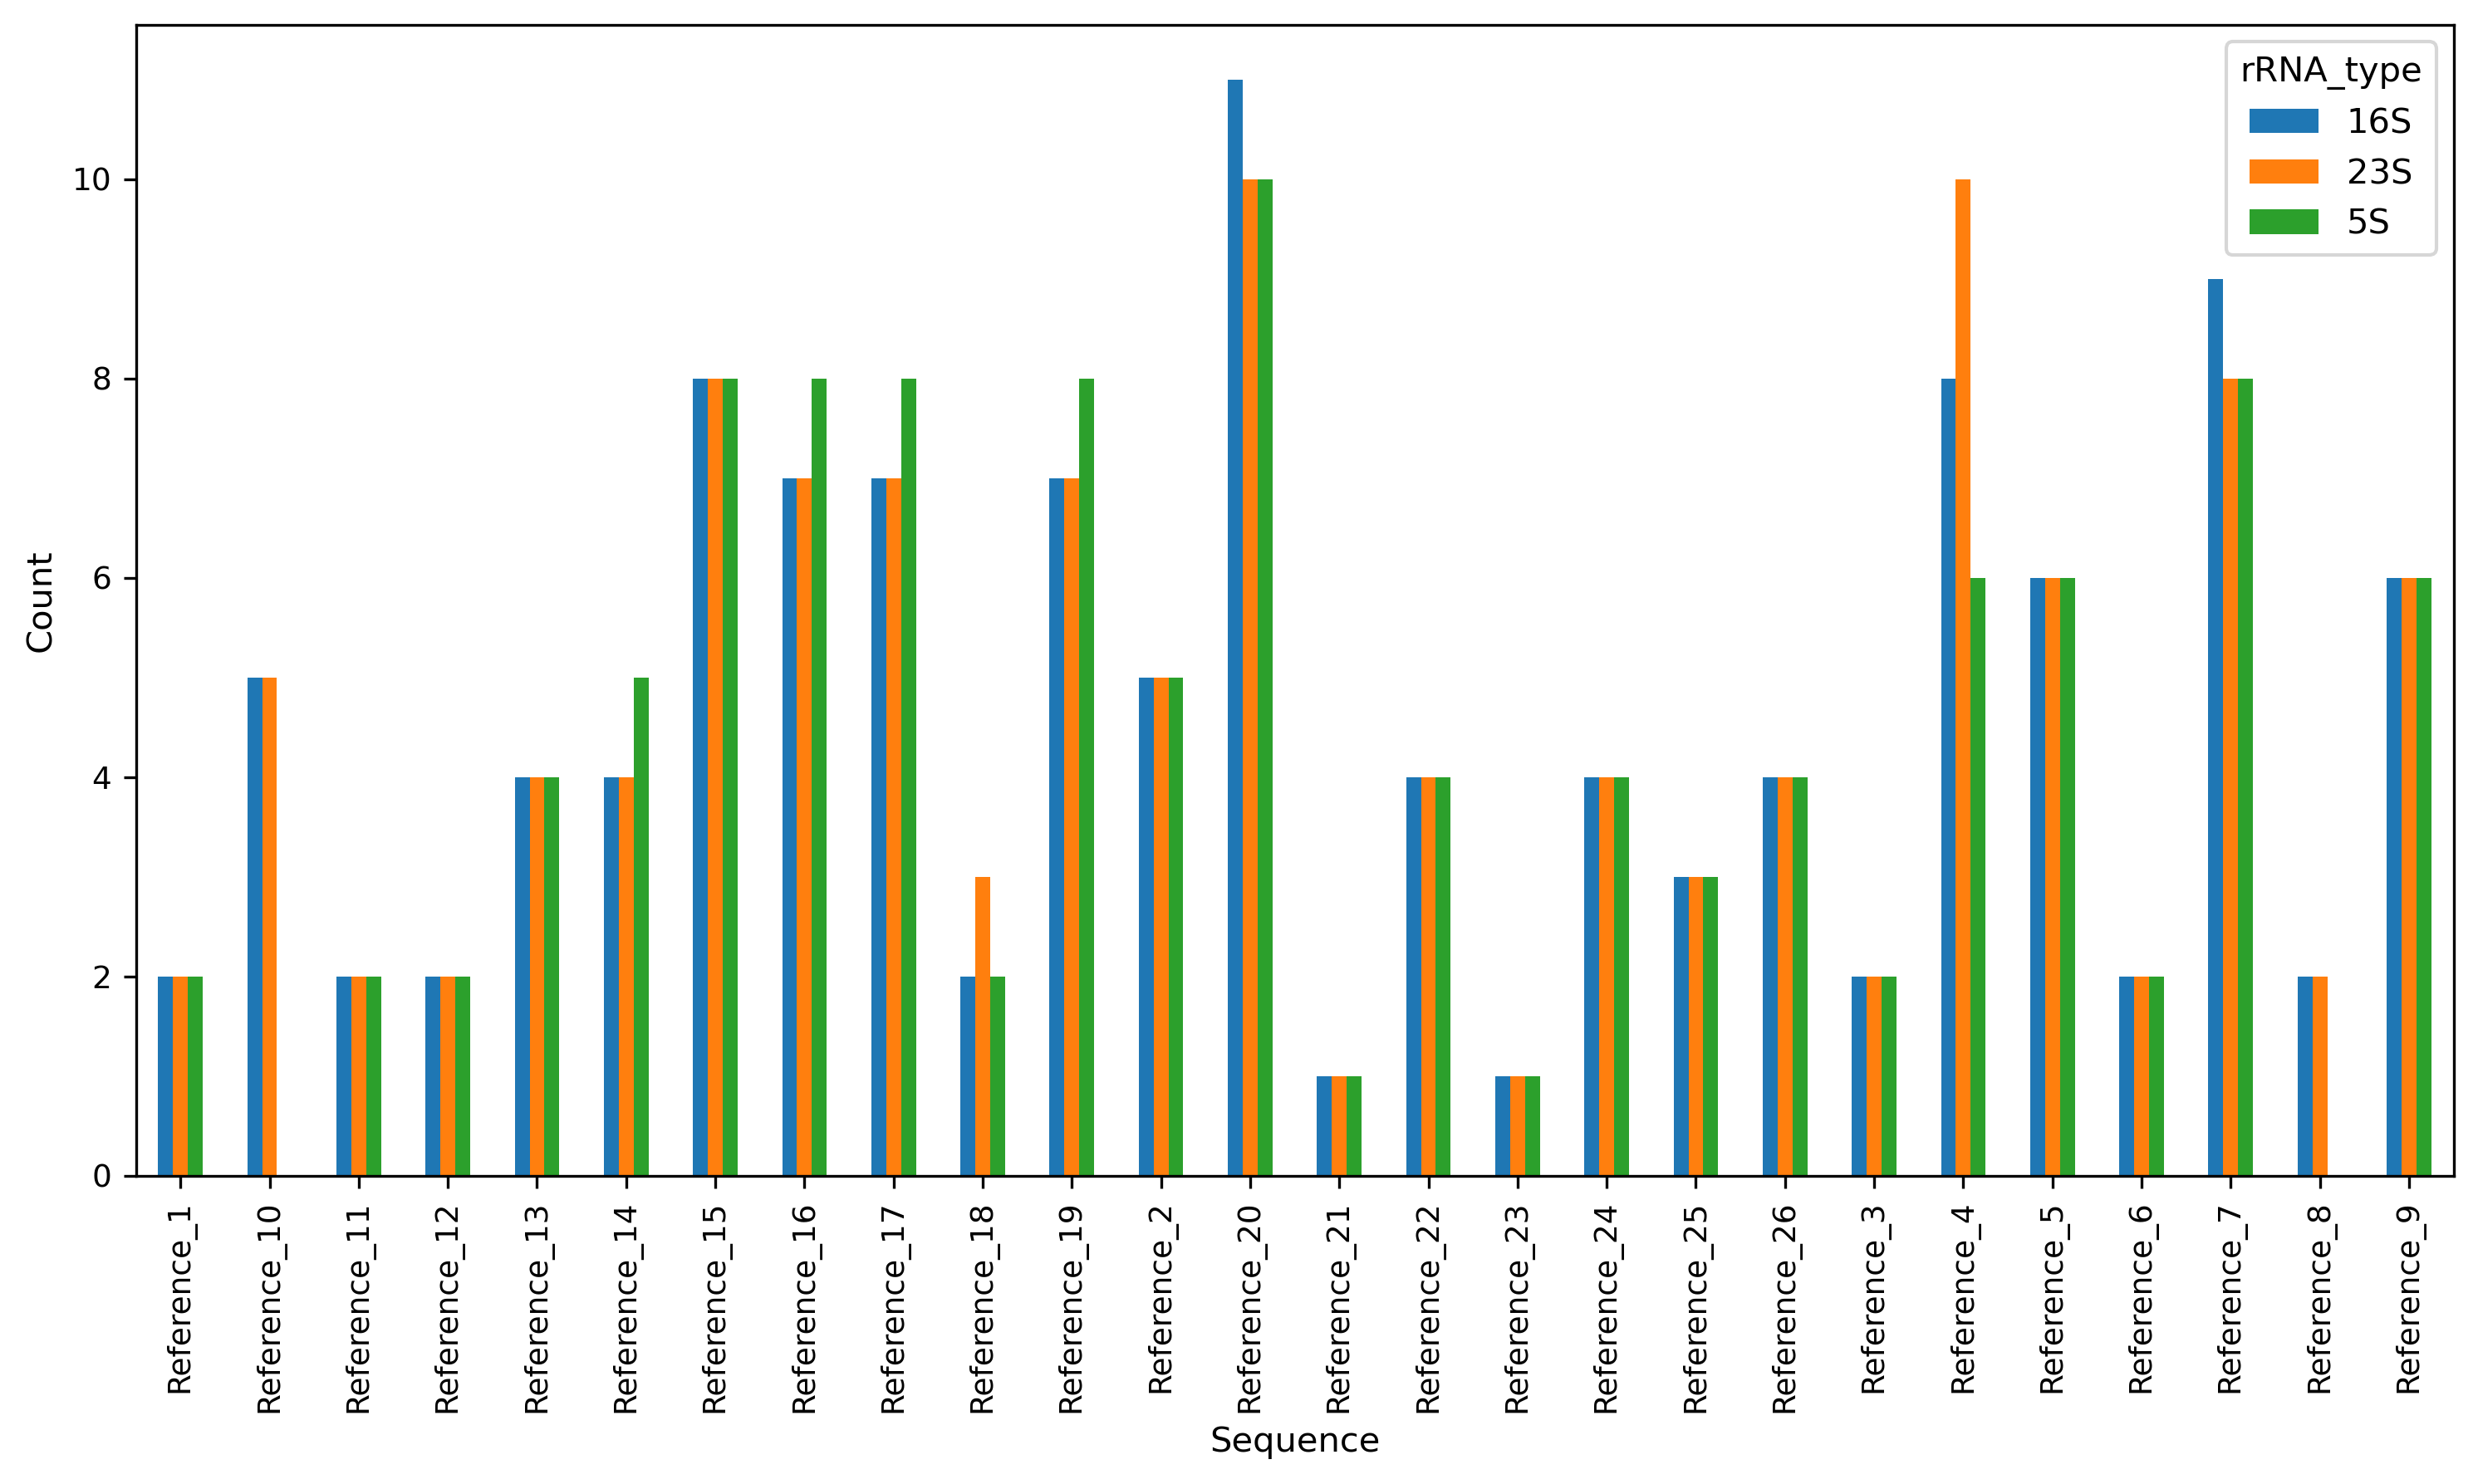

In [8]:
# bar plot for rRNA_type_chr
plt.rcParams["figure.dpi"] = 300
rRNA_type_chr.plot(kind='bar', xlabel='Sequence', ylabel='Count', 
                   fontsize=9, figsize=(12, 6));

In [9]:
# DataFrame with contigs ('name' column) that covers reference rRNA
intersection_df = pd.merge(df_annot, df_aln, on='chromosome', how='inner') # merging two DataFrames on 'chromosome'

# filtering contigs that and references that intersect
intersection_df = intersection_df[(intersection_df.start_y < intersection_df.start_x)
                                  & (intersection_df.end_x <= intersection_df.end_y)]
intersection_df

,chromosome,source,type,start_x,end_x,score_x,strand_x,phase,rRNA_type,start_y,end_y,name,score_y,strand_y
129,Reference_11,barrnap:0.9,rRNA,924358,925855,0.000000e+00,+,.,16S,923529,930070,NODE_1081_length_6540_cov_836.773323,0,-
156,Reference_11,barrnap:0.9,rRNA,926697,929642,0.000000e+00,+,.,23S,923529,930070,NODE_1081_length_6540_cov_836.773323,0,-
183,Reference_11,barrnap:0.9,rRNA,929827,929936,1.400000e-12,+,.,5S,923529,930070,NODE_1081_length_6540_cov_836.773323,0,-
215,Reference_11,barrnap:0.9,rRNA,2074460,2075957,0.000000e+00,+,.,16S,2073631,2080172,NODE_1081_length_6540_cov_836.773323,0,-
242,Reference_11,barrnap:0.9,rRNA,2076799,2079744,0.000000e+00,+,.,23S,2073631,2080172,NODE_1081_length_6540_cov_836.773323,0,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121855,Reference_14,barrnap:0.9,rRNA,2433040,2433152,2.000000e-12,-,.,5S,2433027,2433434,NODE_6108_length_407_cov_1153.232955,0,+
122182,Reference_14,barrnap:0.9,rRNA,3766952,3767064,2.000000e-12,-,.,5S,3766939,3767346,NODE_6108_length_407_cov_1153.232955,0,+
122583,Reference_25,barrnap:0.9,rRNA,1329370,1329473,2.900000e-10,-,.,5S,1329345,1329810,NODE_5333_length_465_cov_547.609756,0,-
125060,Reference_25,barrnap:0.9,rRNA,1822913,1823016,2.900000e-10,+,.,5S,1822575,1823040,NODE_5333_length_465_cov_547.609756,0,+


# Task2. Plot customization

In [10]:
# reading .tsv.gz file with differetial expression data
diffexp_data = pd.read_table("data/diffexpr_data.tsv.gz", sep='\t')
diffexp_data

,Sample,logFC,pval,pval_corr,log_pval
0,PNLIP,10.092524,6.590327e-01,1.000000e+00,-0.000000
1,CELA2A,8.691414,5.823905e-01,1.000000e+00,-0.000000
2,CLPS,8.054078,6.517331e-01,1.000000e+00,-0.000000
3,MPO,7.817773,4.483336e-01,1.000000e+00,-0.000000
4,AMY2A,7.285231,6.324412e-01,1.000000e+00,-0.000000
...,...,...,...,...,...
20525,SLC12A1,-7.834589,4.993254e-58,1.025115e-53,52.989227
20526,SEMG2,-8.651953,3.989840e-04,1.000000e+00,-0.000000
20527,MUC7,-9.196481,3.281804e-07,6.737544e-03,2.171498
20528,SEMG1,-9.313028,3.880575e-04,1.000000e+00,-0.000000


In [11]:
def exp_changes(row):
    '''Function exp_changes() compares log_pval and logFC from diffexpr_data.tsv.gz 
    with threads and sets expression class for each gene
    - thread for log_pval = -log(0.05) = 1.301, where p-value=0.05
    - thread for logFC = 0 (gene is not differentially expressed)
    
    Parameteres:
    row (numpy.Series): DataFrame row - information about gene expression
    
    Returns: class for each gene
    1) 'Significantly downregulated' - log_pval >= 1.301 and logFC < 0;
    2) 'Significantly upregulated' -  log_pval >= 1.301 and logFC > 0;
    3) 'Non-significantly downregulated' - log_pval < 1.301 and logFC < 0;
    4) 'Non-significantly upregulated' - log_pval < 1.301 and logFC > 0  
    '''
    
    if row.log_pval >= 1.301 and row.logFC < 0:
        return 'Significantly downregulated'
    if row.log_pval >= 1.301 and row.logFC > 0:
        return 'Significantly upregulated'    
    if row.log_pval < 1.301 and row.logFC < 0:
        return 'Non-significantly downregulated'
    if row.log_pval < 1.301 and row.logFC > 0:
        return 'Non-significantly upregulated'


# adding new column with gene expression class    
diffexp_data['changes'] = diffexp_data.apply (lambda row: exp_changes(row), axis=1)
diffexp_data

,Sample,logFC,pval,pval_corr,log_pval,changes
0,PNLIP,10.092524,6.590327e-01,1.000000e+00,-0.000000,Non-significantly upregulated
1,CELA2A,8.691414,5.823905e-01,1.000000e+00,-0.000000,Non-significantly upregulated
2,CLPS,8.054078,6.517331e-01,1.000000e+00,-0.000000,Non-significantly upregulated
3,MPO,7.817773,4.483336e-01,1.000000e+00,-0.000000,Non-significantly upregulated
4,AMY2A,7.285231,6.324412e-01,1.000000e+00,-0.000000,Non-significantly upregulated
...,...,...,...,...,...,...
20525,SLC12A1,-7.834589,4.993254e-58,1.025115e-53,52.989227,Significantly downregulated
20526,SEMG2,-8.651953,3.989840e-04,1.000000e+00,-0.000000,Non-significantly downregulated
20527,MUC7,-9.196481,3.281804e-07,6.737544e-03,2.171498,Significantly downregulated
20528,SEMG1,-9.313028,3.880575e-04,1.000000e+00,-0.000000,Non-significantly downregulated


In [12]:
# DataFrame with two the most significantly down- and upregulated genes
sig_exp = diffexp_data[diffexp_data.changes.str.contains(
    'Significantly', regex=True, na=False)].sort_values(
    by='logFC', ascending=False).iloc[[0, 1, -2, -1]]
sig_exp

,Sample,logFC,pval,pval_corr,log_pval,changes
64,ZIC2,4.571915,4.096640e-08,8.410403e-04,3.075183,Significantly upregulated
88,ZIC5,4.276745,3.686245e-09,7.567860e-05,4.121027,Significantly upregulated
20527,MUC7,-9.196481,3.281804e-07,6.737544e-03,2.171498,Significantly downregulated
20529,UMOD,-10.661093,3.717350e-57,7.631720e-53,52.117378,Significantly downregulated


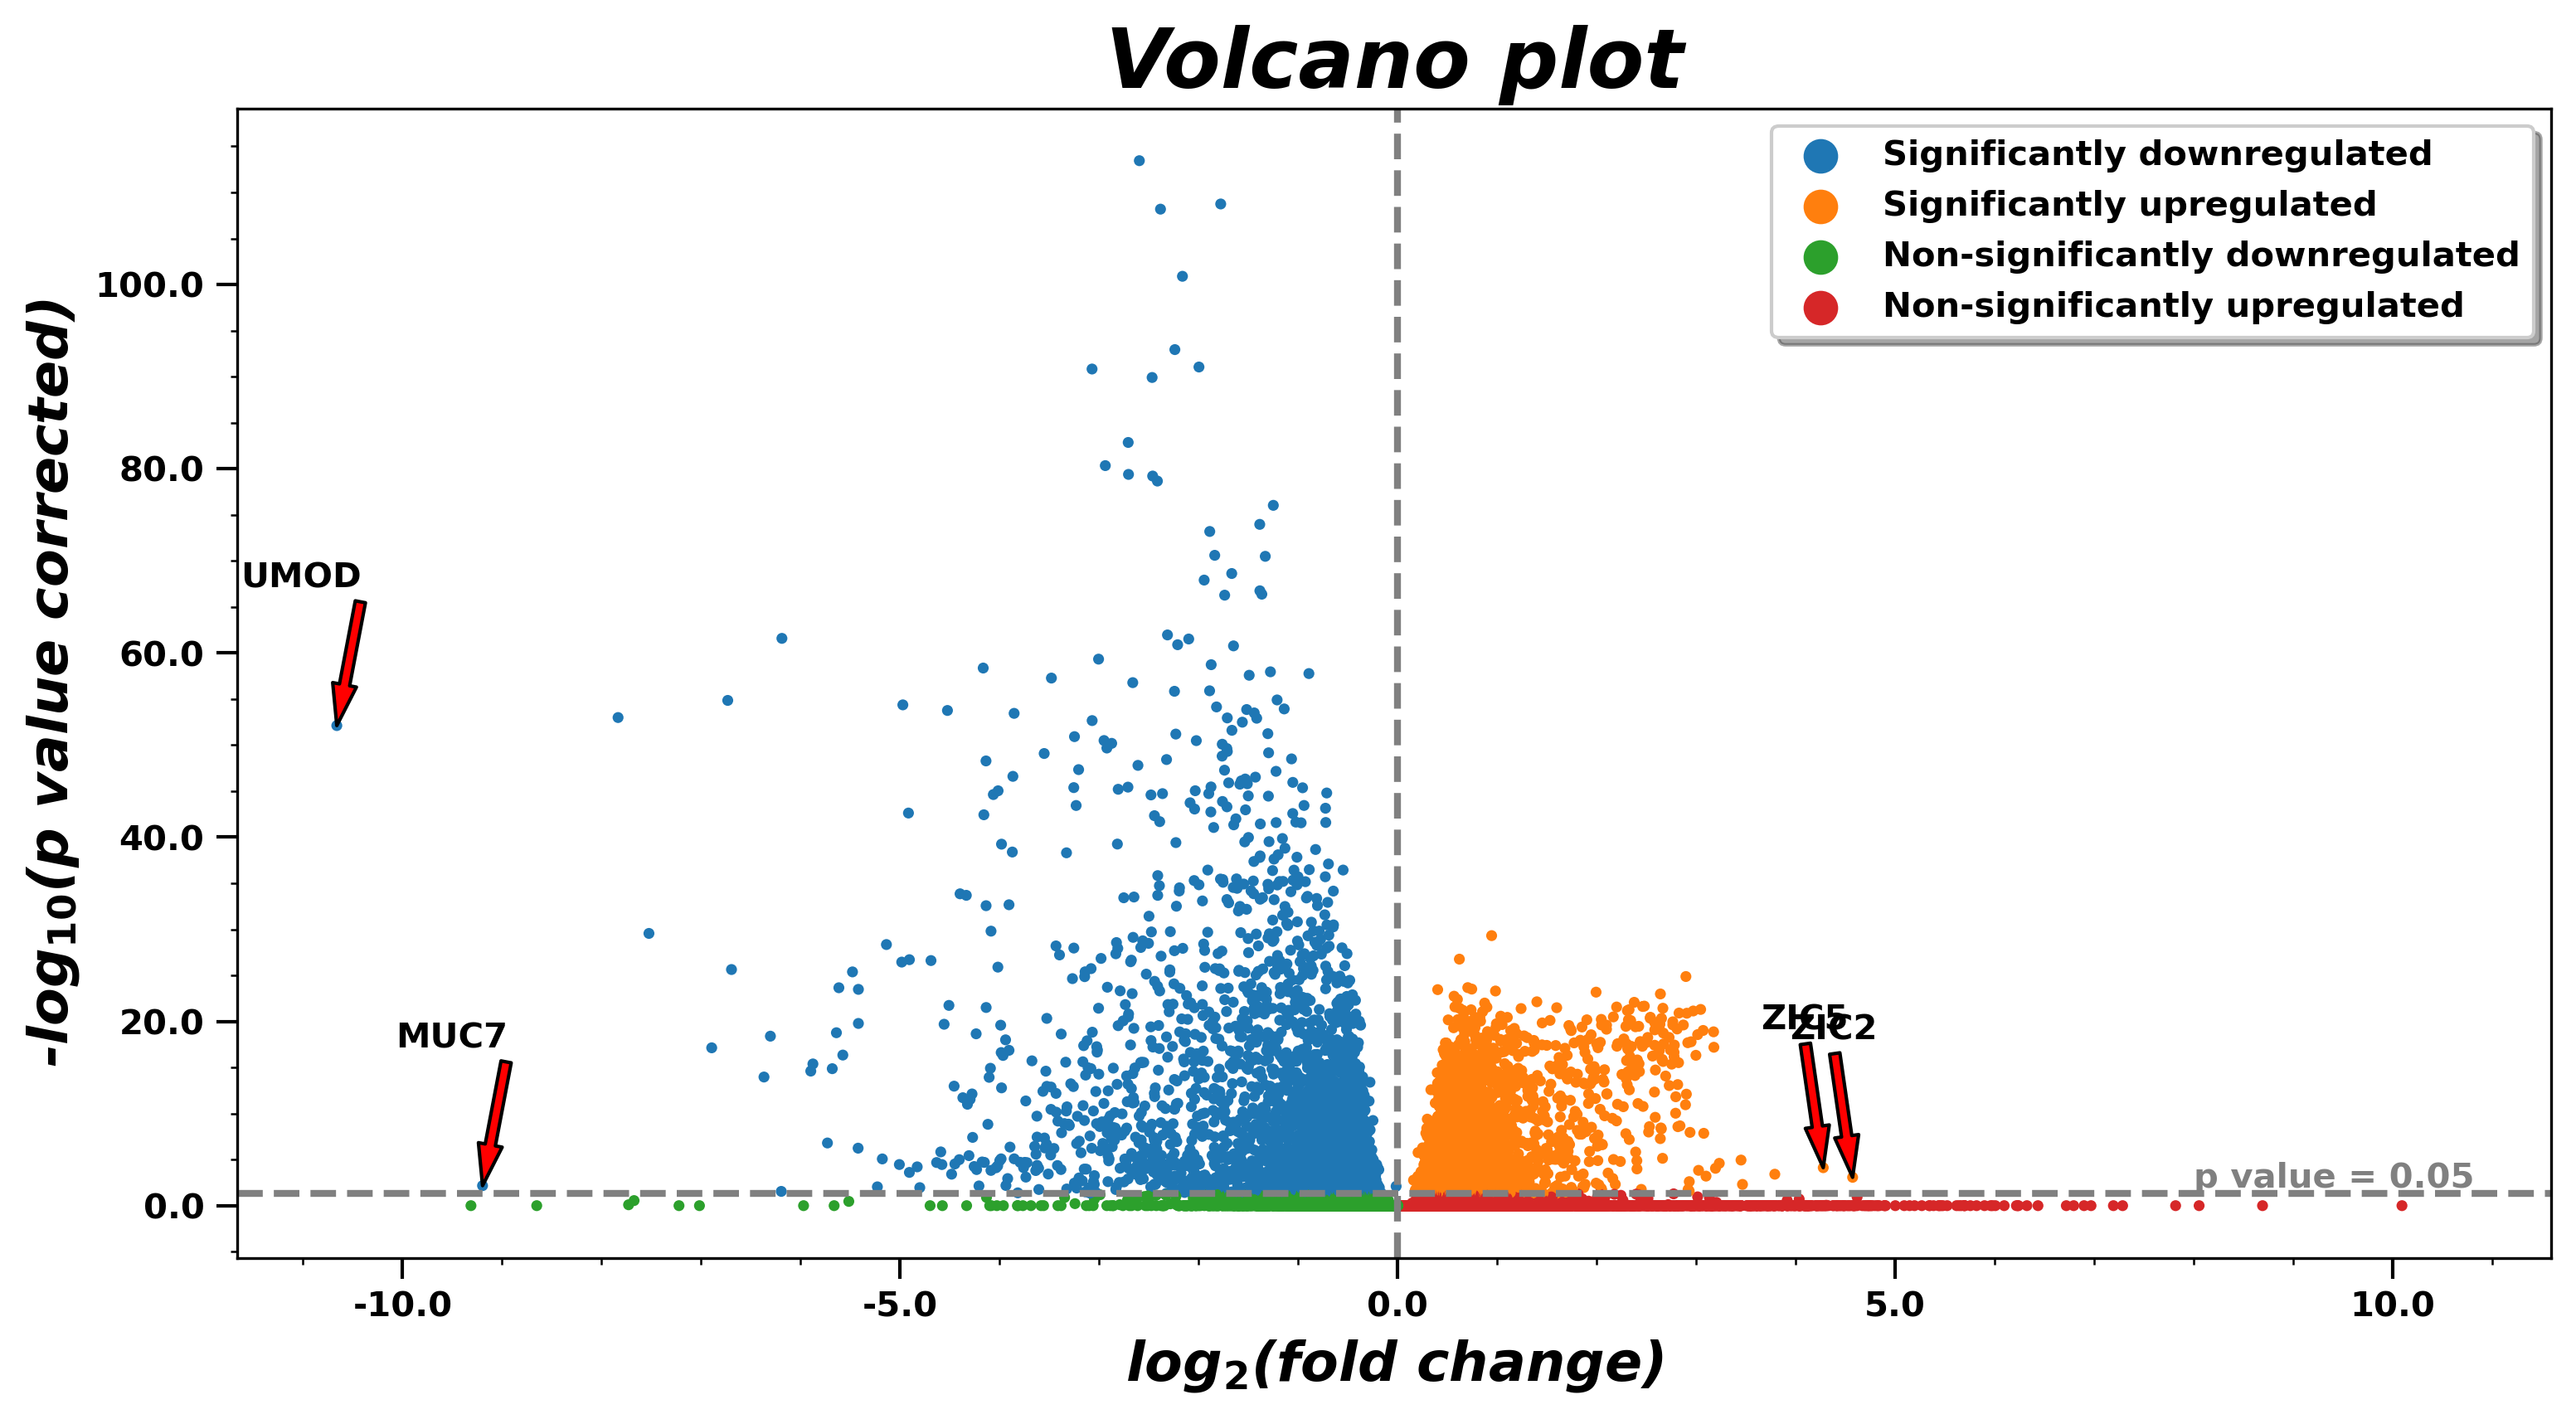

In [15]:
# grouping order for hue and legend
hue_order = [
    'Significantly downregulated', 'Significantly upregulated', 
    'Non-significantly downregulated', 'Non-significantly upregulated'
]

# figure size and resolution
plt.figure(figsize=(12,6), dpi=300)

#scatter plot using seaborn
volcano_plot = sns.scatterplot(
    data=diffexp_data, x='logFC', y='log_pval',
    hue='changes', hue_order=hue_order, s=10, linewidth=0
)

# vertical line (x=0)
plt.axvline(0, color='grey', linestyle='--', linewidth=2)
# horizontal line (y=1.301)
plt.axhline(1.301, color='grey', linestyle='--', linewidth=2)
# limits for x axis
plt.xlim([min(diffexp_data.logFC) - 1, max(diffexp_data.logFC) + 1.5])

# legend customization without title
volcano_plot.legend(
    title=None, shadow=True, 
    fontsize=10, markerscale=1.5, prop={'weight': 'bold'}
)

# show minor ticks
plt.minorticks_on()
# ticks and tick labels cutomization
plt.tick_params(direction='out', labelsize=10, length=6, width=1)
volcano_plot.set_yticklabels(volcano_plot.get_yticks(), weight='bold')
volcano_plot.set_xticklabels(volcano_plot.get_xticks(), weight='bold')

# plot title
plt.title('Volcano plot', size=24, fontweight='bold', style='italic')
# x and y labels with underscored log bases
plt.xlabel(
    'log$_{\mathbf{2}}$(fold change)', size=16, 
    fontweight='bold', style='italic'
)
plt.ylabel(
    '-log$_{\mathbf{10}}$(p value corrected)', size=16, 
    fontweight='bold', style='italic'
)

# text near horizontal line
plt.text(8, 2, 'p value = 0.05', color='grey', size=10, fontweight='bold')

# adding annotation for two the most 
# significantly down- and upregulated genes
for index, row in sig_exp.iterrows():
    plt.annotate(
        row.Sample, xy=(row.logFC, row.log_pval),
        fontweight='bold',
        xytext=(row.logFC + 0.25, row.log_pval + 15),
        horizontalalignment='right',
        arrowprops=dict(
            facecolor='red', edgecolor='black',
            width=3, headwidth=7
        )
    )

# Task3. Pie Chart

In [16]:
# importing Top 100 Languages data
data = pd.read_csv("data/Top_100_Languages.csv", skiprows=1,
                          names=['Language', 'Total_Speakers',
                                 'Native_Speakers', 'Origin'], decimal=',').drop(
    columns=['Total_Speakers','Origin']).set_index('Language')

data.Native_Speakers=data.Native_Speakers.replace(np.nan, 0).astype('int')

# Splitting data
cutoff = 80000000
df1 = data[data.Native_Speakers > cutoff].sort_values(
    by='Native_Speakers', ascending=False) # sorted top wedges
others_df = data[data.Native_Speakers <= cutoff].sort_values(
    by='Native_Speakers', ascending=True) # bottom wedges
df2 = others_df.sum().rename({'Native_Speakers':'Others'}).to_frame(
    name='Native_Speakers') # summed bottom wedges
df3 = pd.concat([df1, df2]) #combined DataFrame

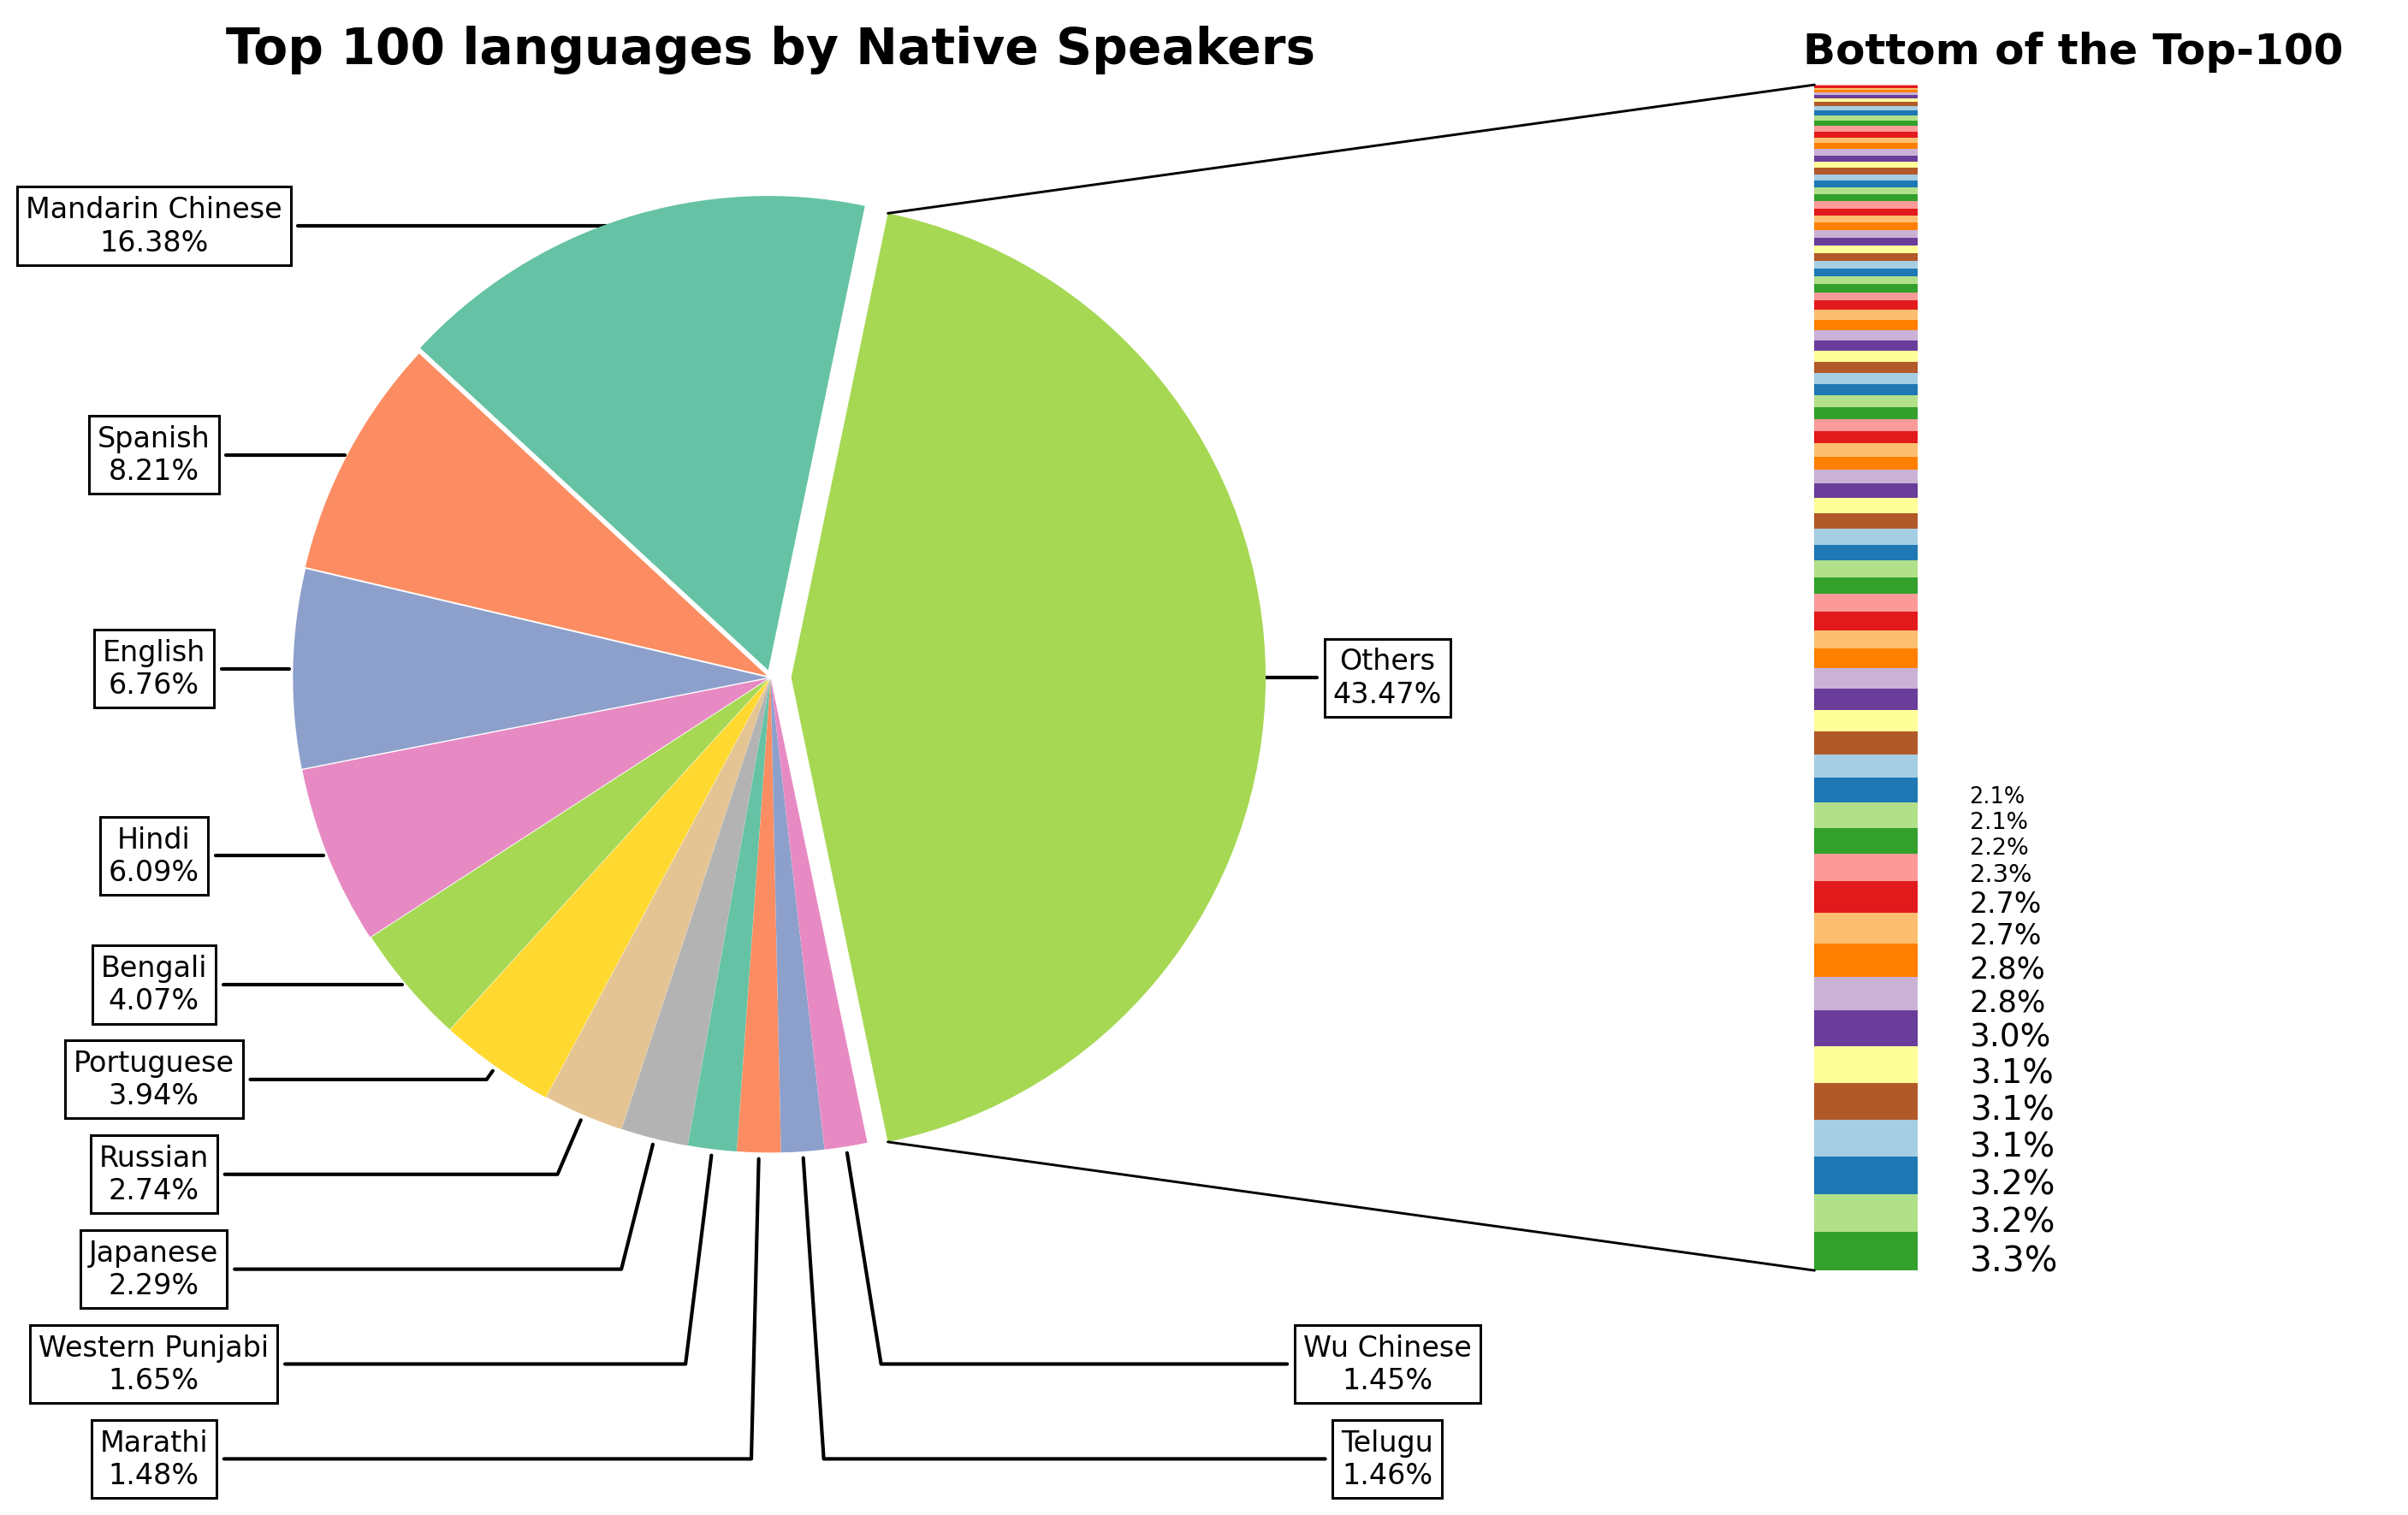

In [19]:
def calc_coords(wedges, delt = 0.2, x_mul=1.3):
    '''Fuction calc_coords() generates coords for drawing arrows and text boxes'''
    
    angs, xs, ys = [], [], []
    for wedge in wedges:
        ang = (wedge.theta2 - wedge.theta1) / 2. + wedge.theta1
        y = np.sin(np.deg2rad(ang))
        x = np.cos(np.deg2rad(ang))
        angs.append(ang)
        xs.append(x)
        ys.append(y)
        
    nys = ys.copy()
    for i in range(1,len(ys) - 1):
        if np.sign(xs[i]) != np.sign(xs[i - 1]):
            nys[i] = nys[i - 1]
        elif nys[i - 1] - nys[i] < delt and xs[i] <= 0:
            nys[i] = nys[i - 1] - delt
        elif nys[i - 1] - nys[i] < xs[i] > 0:
            nys[i] = nys[i - 1] + delt
    nxs = [x_mul * np.sign(i) for i in xs]
    return angs, [*zip(xs,ys)], [*zip(nxs, nys)]


shares = df3['Native_Speakers'] / df3['Native_Speakers'].sum()
explode = [i / 10 for i in shares]
# Generate subplots
fig, (ax1, ax2) = plt.subplots(
    1, 2, figsize=(12,6), dpi=300,
    gridspec_kw={'width_ratios': [5, 2]}
)

# subplot 1 is the piechart itself
wedges, texts = ax1.pie(
    df3.Native_Speakers, explode=explode, startangle=180 * shares[-1], 
    colors=sns.color_palette("Set2", n_colors=13)
)

bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(
    arrowprops=dict(arrowstyle="-"), bbox=bbox_props, 
    zorder=0, va="center", fontsize = 8
)

# Calculation of coords for labels
# Alter param::delt to change spacing between clumped boxes
angs, coords, txt_coords = calc_coords(wedges)

# Drawing arrows and text boxes
for i, wedge in enumerate(wedges):
    connectionstyle = "angle,angleA=0,angleB={}".format(angs[i])
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax1.annotate(
        df3.index[i] + f'\n{shares[i]:.2%}',
        xy=coords[i], xytext=txt_coords[i],
        horizontalalignment='center', **kw)
    
ax1.set_title("Top 100 languages by Native Speakers", fontsize=14, fontweight='bold')

# Draw stacked bar plot with annotations
bottom = 1
width = .2
bar_palette = sns.color_palette("Paired", n_colors=100)

for i, (index, row) in enumerate(others_df.iterrows()):
    height = row['Native_Speakers'] / others_df['Native_Speakers'].sum()
    bottom -= height
    bc = ax2.bar(
        0, height, width, bottom=bottom, 
        label=index, color=bar_palette[i]
    )
    if height > 0.02:
        ax2.annotate(
            f"{height:.1%}", xy=(width, bottom), 
            fontsize=(height * 300)
        )

ax2.set_title('Bottom of the Top-100', fontsize=12, fontweight='bold')
ax2.axis('off')
ax2.set_xlim(-width, 5 * width)

# use ConnectionPatch to draw lines between the two plots
thetas = wedges[-1].theta1, wedges[-1].theta2
center, r = wedges[-1].center, wedges[-1].r

# drawing connecting lines
for i in [0,1]:
    x = r * np.cos(np.pi / 180 * thetas[i]) + center[0]
    y = r * np.sin(np.pi / 180 * thetas[i]) + center[1]
    con = ConnectionPatch(
        xyA=(-width / 2, i), coordsA=ax2.transData,
        xyB=(x, y), coordsB=ax1.transData
    )
    con.set_color([0, 0, 0])
    con.set_linewidth(0.7)
    ax2.add_artist(con)